In [1]:
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerTuple
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_path = '/Users/jk1/temp/resilience_part2/data_for_plots/spont_normalized_data_for_figures.xlsx'

In [3]:
attack_delta_eglob_df = pd.read_excel(data_path, sheet_name='delta_Eglob')
attack_delta_modularity_df = pd.read_excel(data_path, sheet_name='delta_modularity')

spontaneous_eglob_df = pd.read_excel(data_path, sheet_name='spontaneous_Eglob')
spontaneous_modularity_df = pd.read_excel(data_path, sheet_name='spontaneous_modularity')

In [4]:
color1_alpha1 = (0.9647058823529412, 0.06274509803921569, 0.403921568627451, 1)
color1_alpha01 = (0.9647058823529412, 0.06274509803921569, 0.403921568627451, 0.1)

color2_alpha1 = (0.01568627450980392, 0.6078431372549019, 0.6039215686274509, 1)
color2_alpha01 = (0.01568627450980392, 0.6078431372549019, 0.6039215686274509, 0.1)

color3_alpha1 = (0.00392156862745098, 0.17647058823529413, 0.596078431372549, 1)
color3_alpha01 = (0.00392156862745098, 0.17647058823529413, 0.596078431372549, 0.1)

color4_alpha1 = (0.6549019607843137, 0.42745098039215684, 0.996078431372549, 1)
color4_alpha01 = (0.6549019607843137, 0.42745098039215684, 0.996078431372549, 0.1)
palette = sns.color_palette(['#f61067', '#049b9a', '#012D98', '#a76dfe'], n_colors=4)


In [12]:
attack_delta_eglob_df.rename(columns={'sTP1- aTP1 ': 'TP1', 'sTP2-aTP2': 'TP2', 'sTP3-aTP3':'TP3'}, inplace=True)
# melt all TP columns into one column
attack_delta_eglob_df = attack_delta_eglob_df.melt(id_vars=['WITHOUT 0 delta Eglob normalized', 'attack'], value_vars=['TP1', 'TP2', 'TP3'], var_name='TP', value_name='attack_delta_eglob')

In [13]:
attack_delta_eglob_df

,WITHOUT 0 delta Eglob normalized,attack,TP,attack_delta_eglob
0,FCS_024,1,TP1,0.501880
1,FCS_024,2,TP1,0.246992
2,FCS_024,3,TP1,0.839279
3,FCS_024,4,TP1,0.653820
4,FCS_024,5,TP1,-0.335886
...,...,...,...,...
26956,FCS_196,121,TP3,-0.659925
26957,FCS_196,122,TP3,2.890512
26958,FCS_196,123,TP3,2.330358
26959,NaN,NaN,TP3,NaN


## Plot resilience 

resilience: delta Eglob after attack

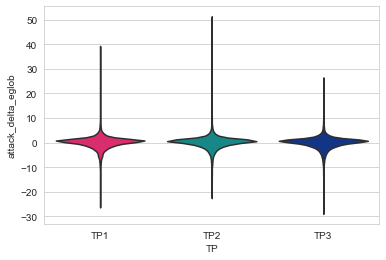

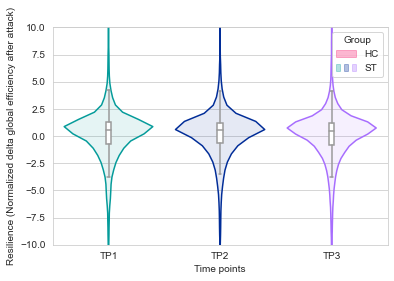

In [26]:
ax = sns.violinplot(x="TP", y="attack_delta_eglob", alpha=0.1,
                    data=attack_delta_eglob_df, palette=palette,
                    dodge=False, inner=None)

# change alpha for edges and faces
# ax.collections[0].set_edgecolor(color1_alpha1)
# ax.collections[0].set_facecolor(color1_alpha01)
ax.collections[0].set_edgecolor(color2_alpha1)
ax.collections[0].set_facecolor(color2_alpha01)
ax.collections[1].set_edgecolor(color3_alpha1)
ax.collections[1].set_facecolor(color3_alpha01)
ax.collections[2].set_edgecolor(color4_alpha1)
ax.collections[2].set_facecolor(color4_alpha01)

ax = sns.stripplot(x="TP", y="attack_delta_eglob", color="k", alpha=0.001, size=5, data=attack_delta_eglob_df,
                   jitter=True, zorder=2)

ax = sns.boxplot(x="TP", y="attack_delta_eglob", data=attack_delta_eglob_df, color='white', width=0.05,
                 dodge=False, boxprops={"zorder": 3}, zorder=4, showfliers=False)

# ax.set_xticklabels(['HC', 'TP1', 'TP2', 'TP3'])
ax.set_xlabel('Time points')
ax.set_ylabel('Resilience (Normalized delta global efficiency after attack)')

hc_patch = mpatches.Patch(color=(0.9647058823529412, 0.06274509803921569, 0.403921568627451, 0.3))
tp1_patch = mpatches.Patch(color=(0.01568627450980392, 0.6078431372549019, 0.6039215686274509, 0.3))
tp2_patch = mpatches.Patch(color=(0.00392156862745098, 0.17647058823529413, 0.596078431372549, 0.3))
tp3_patch = mpatches.Patch(color=(0.6549019607843137, 0.42745098039215684, 0.996078431372549, 0.3))
ax.legend([hc_patch, (tp1_patch, tp2_patch, tp3_patch)], ['HC', 'ST'], title="Group",
          handler_map={tuple: HandlerTuple(ndivide=None)})

# ax2, _ = add_stat_annotation(ax, data=df_temp, x="TP", y="attack_delta_eglob",
#                     order=['HC', 'TP1', 'TP2', 'TP3'],
#                    # text_annot_custom=["0.0017", "0.0017", "0.006"],
#                    box_pairs=[('TP2', 'TP3'), ("TP1", "TP3"), ("HC", "TP3")],
#                    perform_stat_test=False, pvalues=[0.0017, 0.0017, 0.006],
#                    loc='outside', verbose=0)
# fig = ax2.get_figure()

ax.set_ylim(-10, 10)

fig = ax.get_figure()

plt.show()

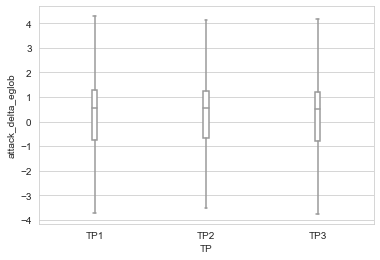

In [25]:
ax = sns.boxplot(x="TP", y="attack_delta_eglob", data=attack_delta_eglob_df, color='white', width=0.05,
                 dodge=False, boxprops={"zorder": 3}, zorder=4, showfliers=False)